<a href="https://colab.research.google.com/github/sahanahub/CourseProjects/blob/main/Basic_Viz_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Pandas for data - https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html#min-tut-01-tableoriented
import pandas as pd

# Seaborn (+ matplotlib) for viz - https://seaborn.pydata.org/examples/index.html
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15,11)})

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Data source
# https://github.com/rfordatascience/tidytuesday/tree/master/data/2023/2023-02-07 - Big Tech Stock Prices

# Load dataset
stock_prices = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-07/big_tech_stock_prices.csv')
companies = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-07/big_tech_companies.csv')

Both of the csvs above have now been read by pandas as DataFrame objects. Further reading -> https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe

First look at data

In [4]:
print("Data points for stock prices:",stock_prices.shape)
stock_prices.head()

Data points for stock prices: (45088, 8)


,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [5]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_symbol  45088 non-null  object 
 1   date          45088 non-null  object 
 2   open          45088 non-null  float64
 3   high          45088 non-null  float64
 4   low           45088 non-null  float64
 5   close         45088 non-null  float64
 6   adj_close     45088 non-null  float64
 7   volume        45088 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 2.8+ MB


In [6]:
stock_prices.isna().sum()

stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64

In [7]:
print("data points for companies:",companies.shape)
companies.head()

data points for companies: (14, 2)


,stock_symbol,company
0,AAPL,Apple Inc.
1,ADBE,Adobe Inc.
2,AMZN,"Amazon.com, Inc."
3,CRM,"Salesforce, Inc."
4,CSCO,"Cisco Systems, Inc."


In [8]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   stock_symbol  14 non-null     object
 1   company       14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [9]:
companies.isna().sum()

stock_symbol    0
company         0
dtype: int64

lets merge data so can read company names better (can use on if column name is same and can use left_on and right_on if column names are different but values are same)

In [10]:
company_stock_prices = pd.merge(stock_prices, companies, how = "inner", left_on="stock_symbol", right_on="stock_symbol")
print("company stock prices:",company_stock_prices.shape)
company_stock_prices.head()

company stock prices: (45088, 9)


,stock_symbol,date,open,high,low,close,adj_close,volume,company
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600,Apple Inc.
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800,Apple Inc.
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000,Apple Inc.
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200,Apple Inc.
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800,Apple Inc.


Which companies have most valuable stocks?

"just groupby gives a groupby object and not a df. then mean() gives a series datatype and df"

In [11]:
company_stock_prices.groupby(['company'])['adj_close'].mean() 

company
Adobe Inc.                                     186.022299
Alphabet Inc.                                   49.148954
Amazon.com, Inc.                                58.905287
Apple Inc.                                      49.445122
Cisco Systems, Inc.                             28.624463
Intel Corporation                               31.310983
International Business Machines Corporation    113.148579
Meta Platforms, Inc.                           147.913244
Microsoft Corporation                           95.285446
NVIDIA Corporation                              50.282939
Netflix, Inc.                                  188.252178
Oracle Corporation                              42.572566
Salesforce, Inc.                               103.400510
Tesla, Inc.                                     58.805222
Name: adj_close, dtype: float64

In [12]:
most_valued_companies = pd.DataFrame(company_stock_prices.groupby(['company'])[['adj_close']].mean().sort_values('adj_close',ascending=False))

In [13]:
most_valued_companies.head()

,adj_close
company,
"Netflix, Inc.",188.252178
Adobe Inc.,186.022299
"Meta Platforms, Inc.",147.913244
International Business Machines Corporation,113.148579
"Salesforce, Inc.",103.400510


How the top 3 stocks did over time to make some viz!

In [14]:
netflix_stock_prices = company_stock_prices[(company_stock_prices['company']=='Netflix, Inc.')][['date','adj_close']]
adobe_stock_prices = company_stock_prices[(company_stock_prices['company']=='Adobe Inc.')][['date','adj_close']]
meta_stock_prices = company_stock_prices[(company_stock_prices['company']=='Meta Platforms, Inc.')][['date','adj_close']]

In [59]:
top_3_data = pd.merge(netflix_stock_prices, adobe_stock_prices, on = 'date', suffixes=("_netflix",'_adobe'))
top_3_data.head()

,date,adj_close_netflix,adj_close_adobe
0,2010-01-04,7.640000,37.090000
1,2010-01-05,7.358571,37.700001
2,2010-01-06,7.617143,37.619999
3,2010-01-07,7.485714,36.889999
4,2010-01-08,7.614286,36.689999


In [60]:
top_3_data = pd.merge(meta_stock_prices, top_3_data, on = 'date', suffixes = ('_meta',''))
top_3_data.head()

,date,adj_close,adj_close_netflix,adj_close_adobe
0,2012-05-18,38.230000,9.994286,31.309999
1,2012-05-21,34.029999,10.248571,32.009998
2,2012-05-22,31.000000,9.672857,32.009998
3,2012-05-23,32.000000,10.272857,32.180000
4,2012-05-24,33.029999,10.038571,31.540001


In [61]:
top_3_data = top_3_data.rename(columns = {'adj_close':'adj_close_meta'})
top_3_data.head()

,date,adj_close_meta,adj_close_netflix,adj_close_adobe
0,2012-05-18,38.230000,9.994286,31.309999
1,2012-05-21,34.029999,10.248571,32.009998
2,2012-05-22,31.000000,9.672857,32.009998
3,2012-05-23,32.000000,10.272857,32.180000
4,2012-05-24,33.029999,10.038571,31.540001


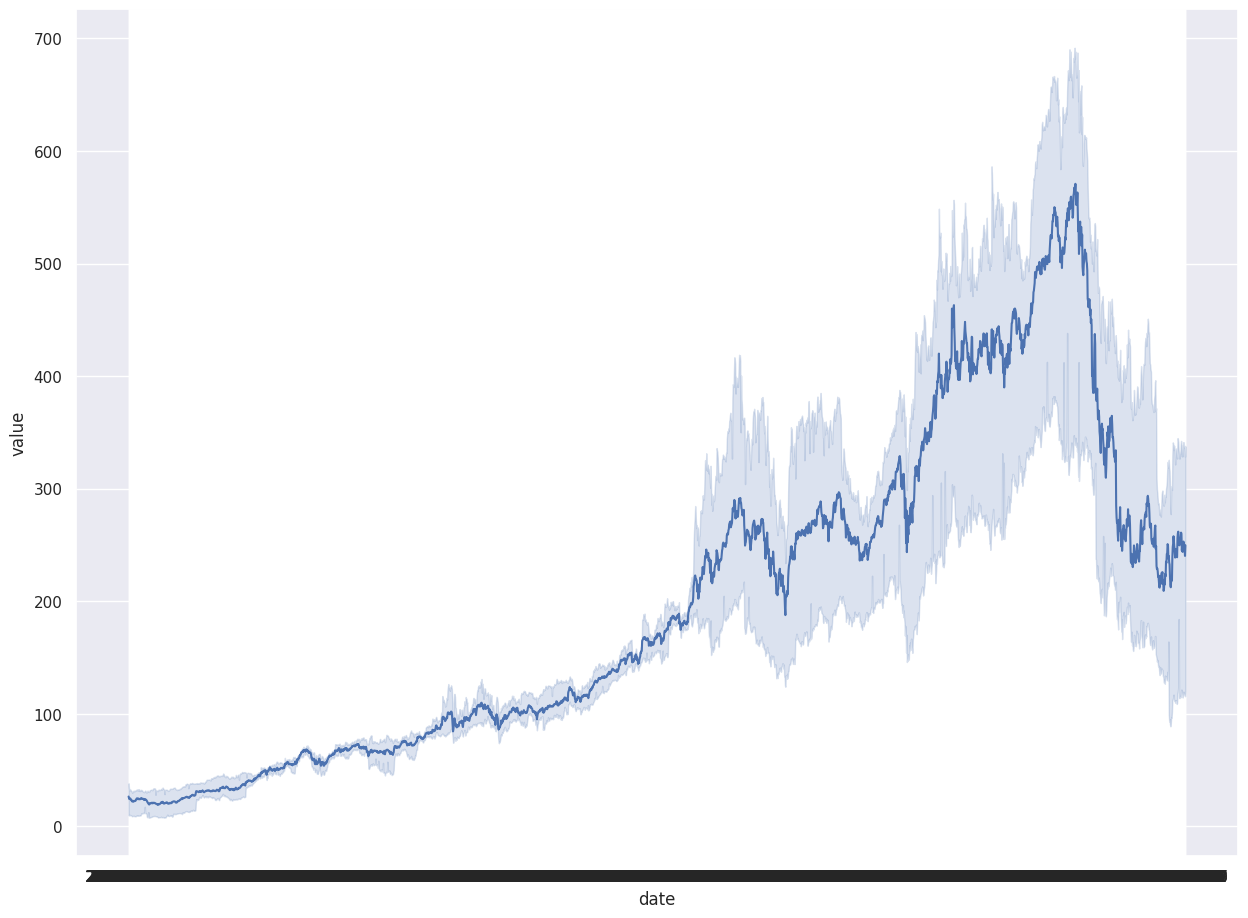

In [62]:
graph = sns.lineplot(x = 'date', y = 'value', data = pd.melt(top_3_data, ['date']))

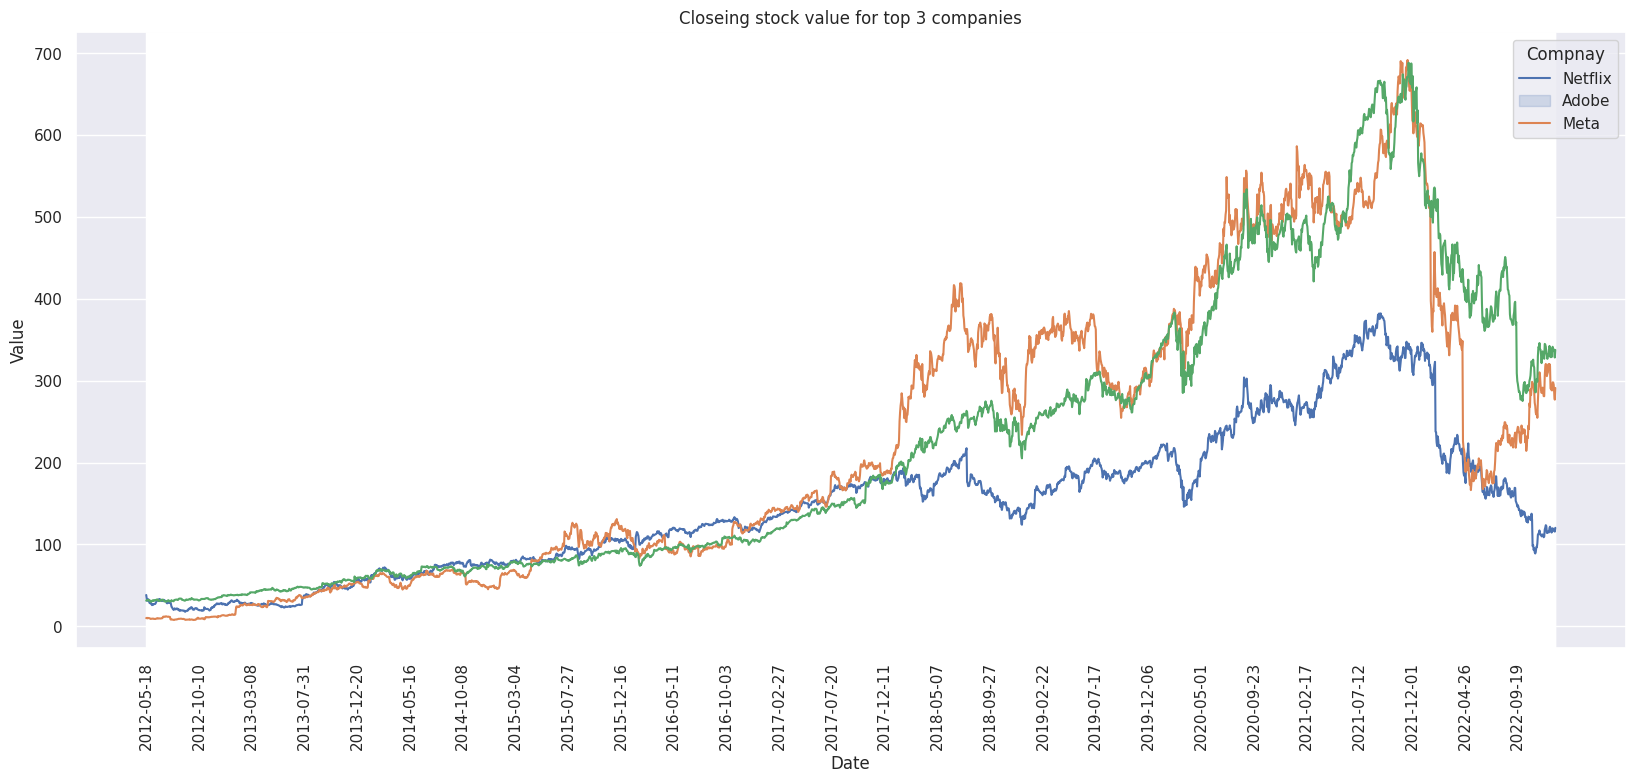

In [63]:
plt.figure(figsize=(20,8))
graph = sns.lineplot(x = 'date', y = 'value', hue = 'variable', data = pd.melt(top_3_data, ['date']))

#lets show the dates, we can pick as many dates as we want to show
for index, label in enumerate(graph.get_xticklabels()):
    if index % 100 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

#
graph.set(xlabel='Date',
          ylabel='Value',
          title='Closeing stock value for top 3 companies')
plt.legend(title='Compnay',labels=['Netflix', 'Adobe', 'Meta'])
plt.xticks(rotation = 90)
plt.show()

Quarterly Trends!

In [19]:
#compute the quearter and year from the date
top_3_date = top_3_data.sort_values('date')
top_3_data['date'] = pd.to_datetime(top_3_data['date'])
top_3_data['quarter'] = top_3_data['date'].dt.quarter
top_3_data['year'] = top_3_data['date'].dt.year
top_3_data['quarter_and_year'] = 'Q' + top_3_data['quarter'].astype(str) + ' ' + top_3_data['year'].astype(str)
top_3_data[['date','quarter_and_year']].head(10)

,date,quarter_and_year
0,2012-05-18,Q2 2012
1,2012-05-21,Q2 2012
2,2012-05-22,Q2 2012
3,2012-05-23,Q2 2012
4,2012-05-24,Q2 2012
5,2012-05-25,Q2 2012
6,2012-05-29,Q2 2012
7,2012-05-30,Q2 2012
8,2012-05-31,Q2 2012
9,2012-06-01,Q2 2012


In [20]:
top_3_by_quarter = top_3_data.groupby(['quarter_and_year']).mean().sort_values(by=['quarter_and_year'])
top_3_by_quarter = top_3_by_quarter.reset_index()
top_3_by_quarter.head()


<ipython-input-20-8a45f12b5945>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_3_by_quarter = top_3_data.groupby(['quarter_and_year']).mean().sort_values(by=['quarter_and_year'])


,quarter_and_year,adj_close_meta,adj_close_netflix,adj_close_adobe,quarter,year
0,Q1 2013,28.446167,22.899619,39.491000,1.0,2013.0
1,Q1 2014,63.368688,57.261335,64.136065,1.0,2014.0
2,Q1 2015,78.340820,60.658946,74.591967,1.0,2015.0
3,Q1 2016,105.512295,98.161476,86.682295,1.0,2016.0
4,Q1 2017,133.637419,140.309517,117.365645,1.0,2017.0


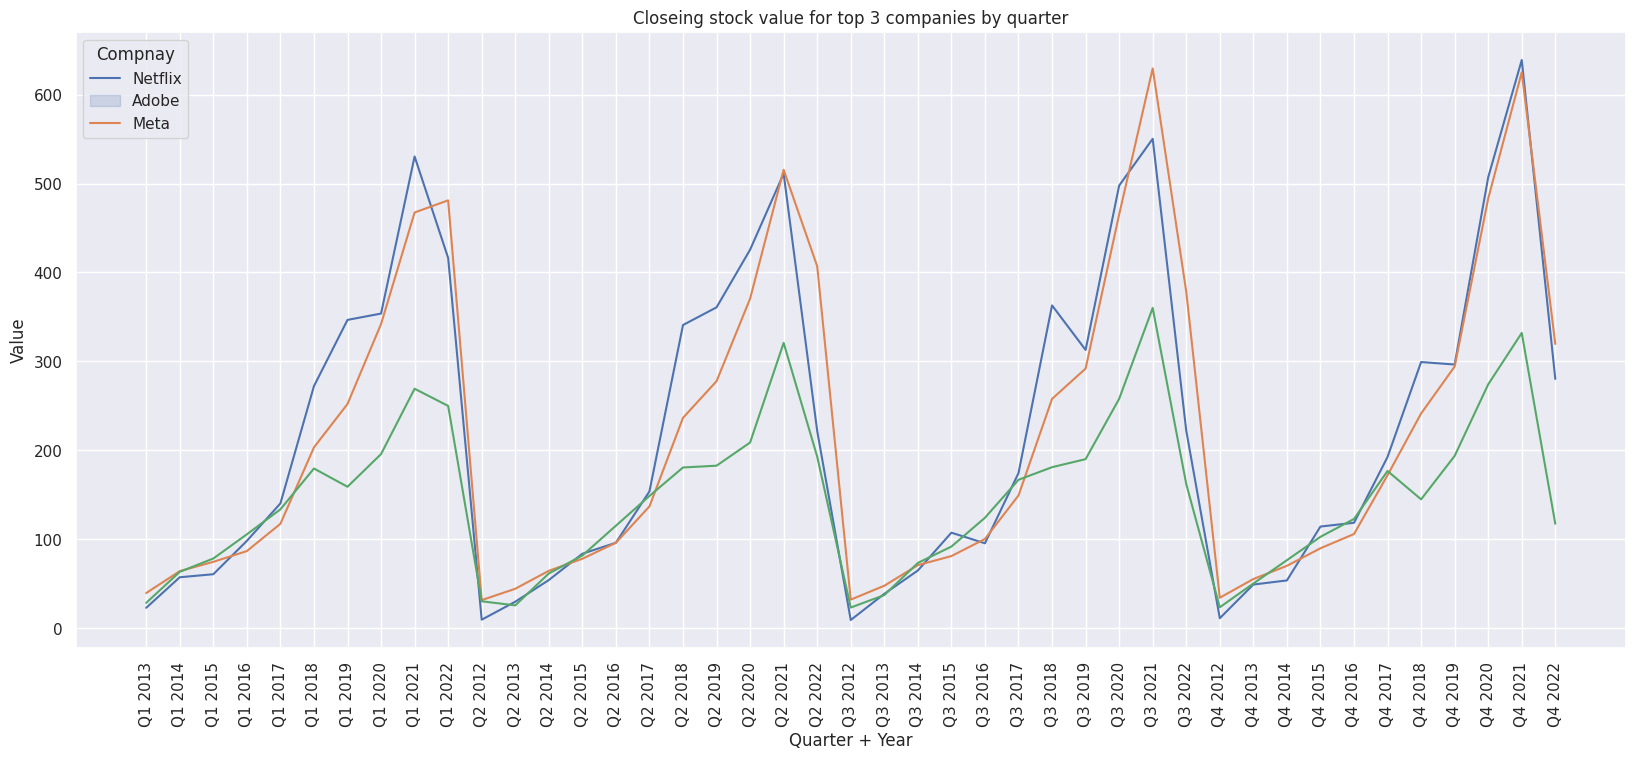

In [51]:
plt.figure(figsize=(20,8))
graph = sns.lineplot(x = 'quarter_and_year', y = 'value', hue = 'variable', data = pd.melt(top_3_by_quarter[['quarter_and_year', 'adj_close_netflix', 'adj_close_adobe', 'adj_close_meta']],['quarter_and_year']))



#
graph.set(xlabel='Quarter + Year',
          ylabel='Value',
          title='Closeing stock value for top 3 companies by quarter')
plt.legend(title='Compnay',labels=['Netflix', 'Adobe', 'Meta'])
plt.xticks(rotation = 90)
plt.show()

In [52]:
!pip install raceplotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from raceplotly.plots import barplot

In [54]:
company_stock_prices.columns

Index(['stock_symbol', 'date', 'open', 'high', 'low', 'close', 'adj_close',
       'volume', 'company'],
      dtype='object')

In [55]:
myraceplot = barplot(company_stock_prices,
                     item_column = 'company',
                     value_column = 'adj_close',
                     time_column = 'date',
                     top_entries = 5)
myraceplot.plot(title = 'Top 10 COmpanies by Stock Price',
                item_label = 'Company',
                value_label = 'Stock Price',
                frame_duration = 10)


Show the distribution between Opening and Closing Stock Prices for all Companies

In [ ]:
open_close_values_of_companies = pd.DataFrame(company_stock_prices.groupby(['company']).mean().sort_values(by=['adj_close'],ascending=False))
open_close_values_of_companies.head(14)
open_close_values_of_companies.info()


Text(0.5, 1.0, 'Distribution between Open and Close prices')

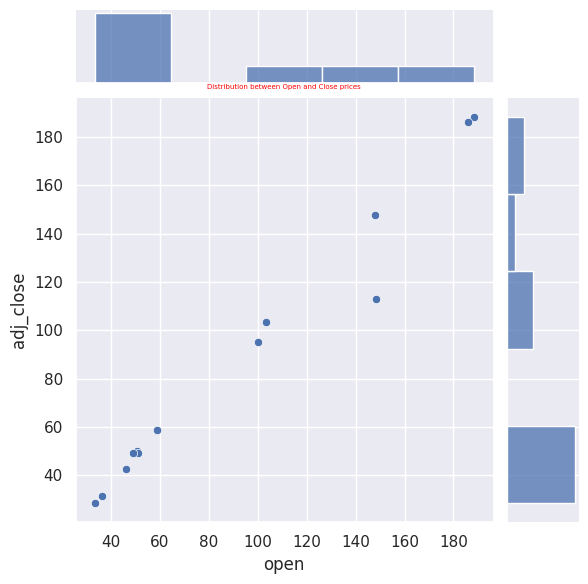

In [50]:
graph = sns.jointplot(x='open',y = 'adj_close',data = open_close_values_of_companies,kind = 'scatter')
plt.title("Distribution between Open and Close prices",fontsize='5',color = 'red')

Comparing the Top 3 Companies Values using BoxPlot

In [29]:
netflix_stock_open_close = company_stock_prices[(company_stock_prices['company']=='Netflix, Inc.')][['date','open','adj_close']]
adobe_stock_open_close = company_stock_prices[(company_stock_prices['company']=='Adobe Inc.')][['date','open','adj_close']]
meta_stock_open_close = company_stock_prices[(company_stock_prices['company']=='Meta Platforms, Inc.')][['date','open','adj_close']]

In [32]:
top_3_open_close = pd.merge(netflix_stock_open_close, adobe_stock_open_close, on = 'date', suffixes=("_netflix",'_adobe'))
top_3_open_close.head()
top_3_open_close = pd.merge(meta_stock_open_close, top_3_open_close, on = 'date', suffixes = ('_meta',''))
top_3_open_close.head()
top_3_open_close = top_3_open_close.rename(columns = {'adj_close':'adj_close_meta','open':'open_meta'})
top_3_open_close.head()


,date,open_meta,adj_close_meta,open_netflix,adj_close_netflix,open_adobe,adj_close_adobe
0,2012-05-18,42.049999,38.230000,10.328571,9.994286,32.099998,31.309999
1,2012-05-21,36.529999,34.029999,9.978571,10.248571,31.450001,32.009998
2,2012-05-22,32.610001,31.000000,10.257143,9.672857,31.969999,32.009998
3,2012-05-23,31.370001,32.000000,9.638571,10.272857,31.700001,32.180000
4,2012-05-24,32.950001,33.029999,10.217143,10.038571,32.169998,31.540001


Text(0.5, 1.0, 'BoxPlot for Top 3 companies Open and Close values')

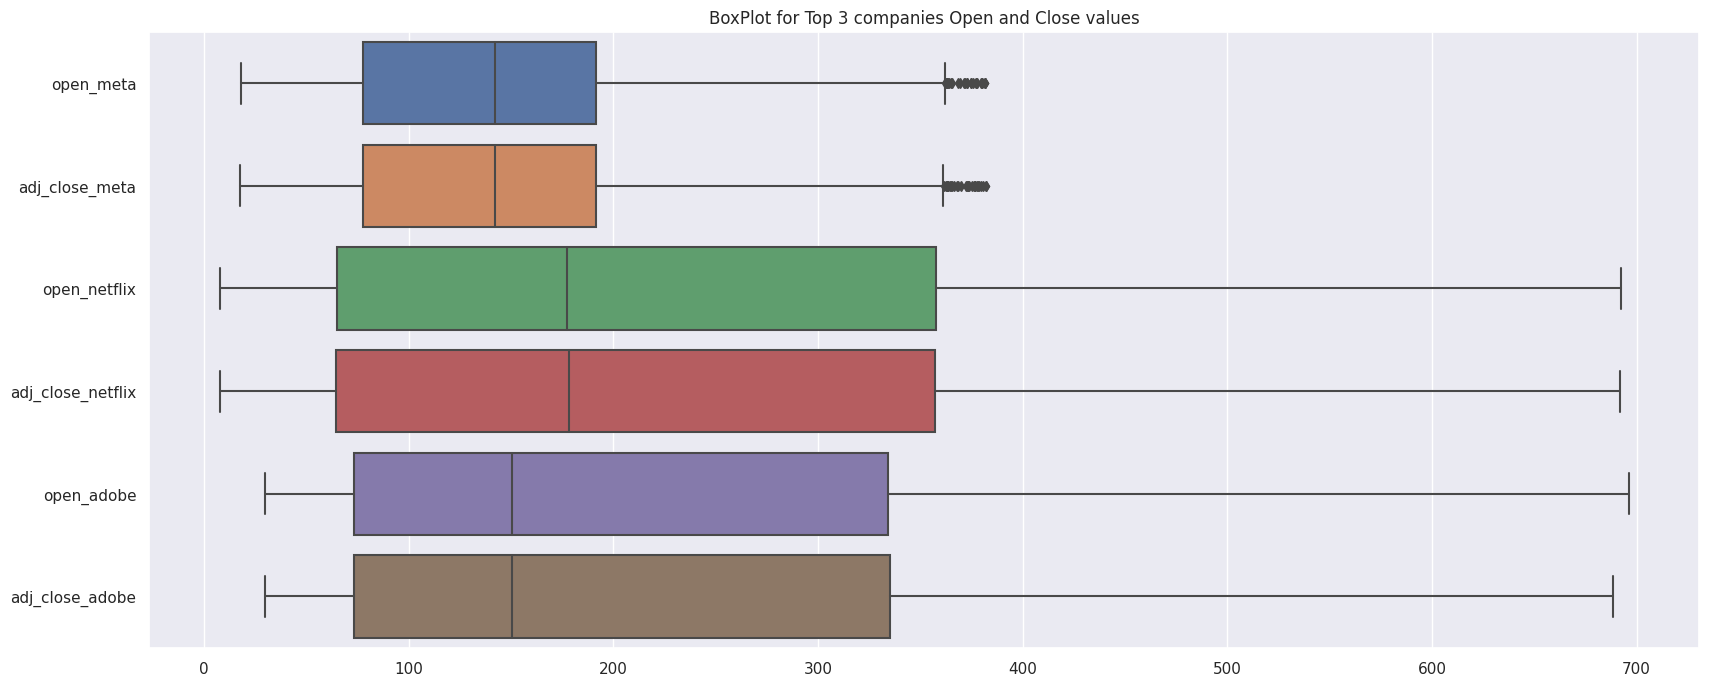

In [38]:
plt.figure(figsize=(20,8))
graph = sns.boxplot(data=top_3_open_close,orient='h')
plt.title('BoxPlot for Top 3 companies Open and Close values')